# Noisets Examples:

In [1]:
import numpy as np
import noisets
from noisets import noisettes as ns

import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In this notebook, we are interested in the YFV data, published in 2019 by M.Pogorelyy. 

In [2]:
path = '../../Data-sets/Yellow_fever/'
filename1 = 'S1_0_F1_.txt' # first biological replicate
filename2 = 'S1_15_F1_.txt' # second biological replicate
mincount = 0 # always put 0 here (prefered) to extract the whole data-set and then modify it
maxcount = np.inf # always put np.inf here (prefered) to extract the whole data-set and then modify it
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

- Create an object that will be associate to a particular patient, for two dates of interest. In this notebook, we are focused on the expansion.

In [3]:
cl_S1 = ns.Data_Process(path, filename1, filename2, mincount, maxcount, colnames1,  colnames2)
print("First Filename is : " , cl_S1.filename1)
print("Second Filename is : ",  cl_S1.filename2)
print("Name of the columns of first file are : ", cl_S1.colnames1)
print("Name of the columns of second file are : ", cl_S1.colnames2)
print("Minimum count is ", cl_S1.mincount)
print("Maximum count is ", cl_S1.maxcount)

First Filename is :  S1_0_F1_.txt
Second Filename is :  S1_15_F1_.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Minimum count is  0
Maximum count is  inf


- Create the data-frame 

In [4]:
n, df = cl_S1.import_data()

In [5]:
df

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.007298,3.108825e-03,7000.0,3492.0,TGCGCCAGCAGCCCCCAGTTCACAGGCTCCTACGAGCAGTACTTC,CASSPQFTGSYEQYF
1,0.004135,3.081227e-03,3966.0,3461.0,TGTGCCAGCAGTTCCCCCATAGCGGGACAAAGCTCCTACGAGCAGT...,CASSSPIAGQSSYEQYF
2,0.003358,2.002219e-03,3221.0,2249.0,TGCAGTGCTTCTCTTGCGTCGGGCACCGGGGAGCTGTTTTTT,CSASLASGTGELFF
3,0.002515,1.779651e-03,2412.0,1999.0,TGTGCCAGCAGTTACGGACAGGGCAATCAGCCCCAGCATTTT,CASSYGQGNQPQHF
4,0.002389,1.395944e-03,2292.0,1568.0,TGTGCCAGCAGTTGGGGACAGGGGGTAAACGAGCAGTACTTC,CASSWGQGVNEQYF
...,...,...,...,...,...,...
1258568,0.000000,8.902706e-07,0.0,1.0,TGAAGCTTTCTTT,*S_FF
1258569,0.000000,8.902706e-07,0.0,1.0,ACCCCTCCACTTT,TP_HF
1258570,0.000000,8.902706e-07,0.0,1.0,TGTGCCCTAAGT,CALS
1258571,0.000000,8.902706e-07,0.0,1.0,TGTGCCAGGTTT,CARF


- Visualization of the data

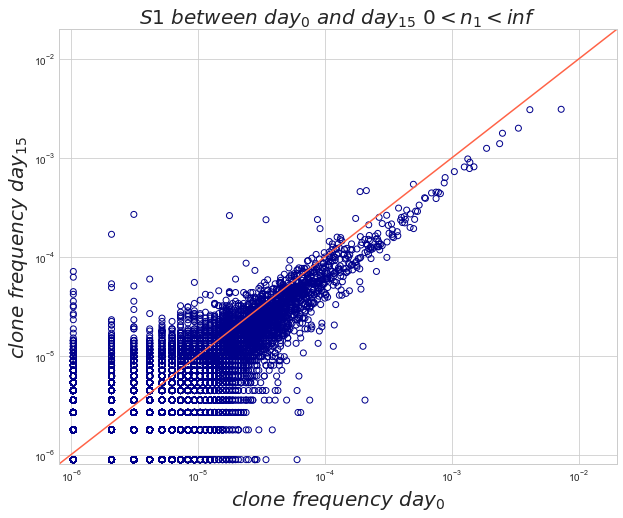

In [6]:
# All the persistent clones between the two samples 
cl_S1.scatter_plot(0, np.inf, 'day', '0', '15', 'S1') #see the documentation for the input variables
#add the (0,x) and (x,0) points

## Expansion 

In [10]:
sparse_rep = cl_S1.get_sparserep(df) # explain what is exactly sparse_rep, the center object of all the inference
indn1,indn2,sparse_rep_counts,unicountvals_1,unicountvals_2, NreadsI, NreadsII = sparse_rep  # definition of sparse rep

In [11]:
paras_1 = [-2.02192528,   0.45220384,   1.06806274, -10.18866972] #parameters for the noise model for time_1 S1
paras_2 =  [-2.02192528,   0.45220384,   1.06806274, -10.18866972] #parameters for the noise model for time_2 S2

acq_model_type = 2 # Negative Binomial Sampling Noise Model
#other models :
# 0 : NB + Poisson
# 1 : Poisson + NB 
# 2 : NB
# 3 : Poisson

In [12]:
expansion = ns.Expansion_Model()

/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:664: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:664: RuntimeWarning: invalid value encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:774: RuntimeWarning: divide by zero encountered in log


N_obs: 1258573
Calculation Surface : 

--- 379.04141879081726 seconds ---


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:1087: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:1087: RuntimeWarning: invalid value encountered in true_divide


writing to: testexpansion


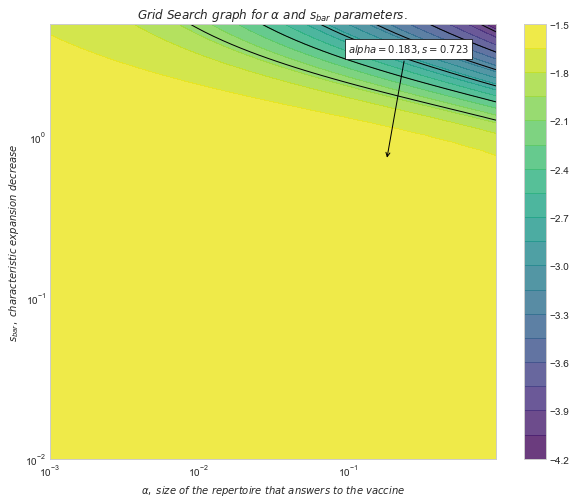

In [13]:
pval_threshold = 0.05
smed_threshold = 0
outpath = 'testexpansion'

expansion.expansion_table(outpath, paras_1, paras_2, sparse_rep, df, acq_model_type, pval_threshold, smed_threshold)